# Pipeline concept (Titanic dataset)

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

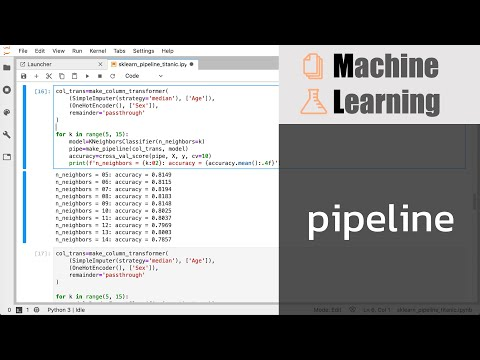

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('caQziky_248', width=720, height=405)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

print(f'pandas version:  {pd.__version__}')
print(f'seaborn version: {sns.__version__}')


pd.Timestamp.now()

pandas version:  1.0.5
seaborn version: 0.10.1


Timestamp('2020-11-12 14:40:32.198145')

In [8]:
urls = 'https://github.com/dragon-library/work_space/raw/main/HS_Code/Lab/data/hs_code.xlsx'
#urls = 'data/hs_code.xlsx'
types = 'section'
#types = "chapter"

def get_master(sheets,types = 'section'):
    data = pd.read_excel(urls,sheet_name= sheets)
    data[types] = data[types].map('{:02}'.format)
    data = data[[types,'description']]
    data['description'] = data['description'].str.lower()
 #   data = data.rename(columns={'heading' : 'target', 'product_desc' : 'question_text'})
     

    return data

def manage_data(df):
    df.columns = ['target', 'data']   
    
    
    return df

In [9]:
types = "section"
#types = "chapter"

print("Load the dataset: Section")



sheets = '8_digit'
eights = get_master(sheets,types)

sheets = '2_digit'
twos = get_master(sheets,types)

sheets = 'Declaration_2019_10'
decla = get_master(sheets,types)

data = pd.concat([eights,twos,decla], ignore_index=True)
df = manage_data(data)
df.head()

Load the dataset: Section


,target,data
0,01,"horses; live, purebred breeding animals - pure..."
1,01,"horses; live, other than purebred breeding ani..."
2,01,asses; live - other
3,01,mules and hinnies; live- other
4,01,"cattle; live, purebred breeding animals - pure..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  30871 non-null  object
 1   data    30871 non-null  object
dtypes: object(2)
memory usage: 482.5+ KB


# scikit-learn

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [12]:
df[:5]

,target,data
0,01,"horses; live, purebred breeding animals - pure..."
1,01,"horses; live, other than purebred breeding ani..."
2,01,asses; live - other
3,01,mules and hinnies; live- other
4,01,"cattle; live, purebred breeding animals - pure..."


In [13]:
X=df[['data']]
y=df.target

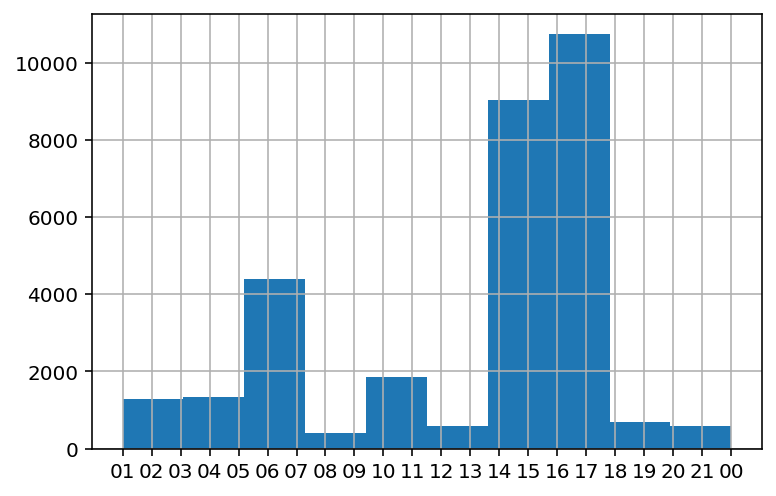

In [14]:
df['target'].hist()

col_trans=make_column_transformer(
    (SimpleImputer(strategy='median'), ['Age']),
    (OneHotEncoder(), ['Sex']),
    remainder='passthrough'
)
col_trans

In [24]:
model=KNeighborsClassifier()

In [25]:
pipe=make_pipeline( model)
pipe

Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())])

## cross validation score

In [27]:
accuracy=cross_val_score(X, y, cv=10)
print(accuracy)


TypeError: estimator should be an estimator implementing 'fit' method,                                                     data
0      horses; live, purebred breeding animals - pure...
1      horses; live, other than purebred breeding ani...
2                                    asses; live - other
3                        mules and hinnies; live-  other
4      cattle; live, purebred breeding animals - pure...
...                                                  ...
30866                           adjust gear set jfkz658b
30867                aluminium window frame kf057072avat
30868                   acrylic plate 4mm. size24x24 cm.
30869                      ac power cord p/n 141102240p6
30870     automotive disc brake pads 220177988 db24114wd

[30871 rows x 1 columns] was passed

### KNeighborsClassifier(n_neighbors=?)

In [23]:

for k in range(5, 15):
    model=KNeighborsClassifier(n_neighbors=k)    
    pipe=make_pipeline(model)
    accuracy=cross_val_score(pipe, X, y, cv=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\ProgramData\Anaconda

### RandomForestClassifier(n_estimators=?)

In [16]:
col_trans=make_column_transformer(
    (SimpleImputer(strategy='median'), ['Age']),
    (OneHotEncoder(), ['Sex']),
    remainder='passthrough'
)

for k in range(5, 15):
    model=RandomForestClassifier(n_estimators=k)    
    pipe=make_pipeline(col_trans, model)
    accuracy=cross_val_score(pipe, X, y, cv=10)
    print(f'n_estimators = {k:02}: accuracy = {accuracy.mean():.4f}')

n_estimators = 05: accuracy = 0.7970
n_estimators = 06: accuracy = 0.7992
n_estimators = 07: accuracy = 0.8026
n_estimators = 08: accuracy = 0.7981
n_estimators = 09: accuracy = 0.8004
n_estimators = 10: accuracy = 0.7914
n_estimators = 11: accuracy = 0.8059
n_estimators = 12: accuracy = 0.8082
n_estimators = 13: accuracy = 0.8026
n_estimators = 14: accuracy = 0.7959


# train_test_split

In [17]:
col_trans=make_column_transformer(
    (SimpleImputer(strategy='median'), ['Age']),
    (OneHotEncoder(), ['Sex']),
    remainder='passthrough'
)
model=KNeighborsClassifier(n_neighbors=7)
pipe=make_pipeline(col_trans, model)

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, stratify=y)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8324022346368715

In [19]:
X[:3]

,Sex,Age,SibSp,Parch,Pclass
0,male,22.0,1,0,3
1,female,38.0,1,0,1
2,female,26.0,0,0,3


In [20]:
X_new=pd.DataFrame(
{
    'Sex': ['male', 'female'],
    'Age': [25, 20],
    'SibSp': [1, 2],
    'Parch': [0, 0],
    'Pclass': [1, 3]
})
X_new

,Sex,Age,SibSp,Parch,Pclass
0,male,25,1,0,1
1,female,20,2,0,3


In [21]:
pipe.predict(X_new)

array([0, 0])

In [22]:
pipe.predict_proba(X_new)

array([[0.71428571, 0.28571429],
       [0.57142857, 0.42857143]])

In [23]:
predicted=pipe.predict(X_test)
predicted

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1])

## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [24]:
metrics.confusion_matrix(y_test, predicted)

array([[99, 11],
       [19, 50]])

In [25]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()

In [26]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 99
fp = 11
fn = 19
tp = 50


$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [27]:
metrics.accuracy_score(y_test, predicted)

0.8324022346368715

In [28]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [29]:
tn/(tn + fn) # precision (class = 0)

0.8389830508474576

In [30]:
tn/(tn + fp) # recall (class = 0)

0.9

In [31]:
tp/(tp + fp) # precision (class = 1)

0.819672131147541

In [32]:
tp/(tp + fn) # recall (class = 1)

0.7246376811594203